In [1]:
import pandas as pd
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = f'../SI_Toolkit_ASF/Experiments/Experiment-0_real_car/Recordings_preprocessed/Train/*.csv'
# path = f'../SI_Toolkit_ASF/Experiments/Experiment-0_final/Recordings/Train/*.csv'

files = glob.glob(path)
dfs = []
for file in files:
    dfs.append(pd.read_csv(file, skiprows=8))
frame = pd.concat(dfs, axis=0, ignore_index=True)
exclude = ['WYPT', 'LIDAR', 'linear_vel_y', 'mu', 'pose_theta_']
frame = frame[[col for col in frame.columns if not any(tmp in col for tmp in exclude)]]
frame.describe()

,time,angular_control,translational_control,angular_vel_z,linear_vel_x,pose_theta,pose_x,pose_y,slip_angle,steering_angle,experiment_index,D_pose_x,D_pose_y,D_pose_theta,D_linear_vel_x,D_angular_vel_z,D_slip_angle,D_steering_angle,D_car_pose_x,D_car_pose_y
count,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000,139180.000000
mean,399.693608,0.000155,4.110452,-0.002189,3.940451,-7.708669,-16.218366,17.367467,0.000280,0.000180,178.705425,-0.070864,0.026181,-0.000819,0.394579,-0.025536,0.000252,-0.001215,3.830699,0.001372
std,230.616412,0.192355,1.940622,1.523598,1.752674,46.481657,97.176426,97.680159,0.135409,0.171574,104.337068,3.053932,3.000516,1.472836,3.961520,10.837284,0.825825,1.572630,1.673470,0.927600
min,0.000000,-0.830367,1.000095,-7.810953,0.622139,-131.982060,-441.886170,-345.329440,-0.784639,-0.418900,0.000000,-7.967072,-7.963409,-7.882290,-9.010005,-29.990248,-4.977908,-3.200000,0.000000,-3.998681
25%,199.500000,-0.128765,2.439420,-0.882529,2.508574,-37.861597,-73.982531,-44.823283,-0.049523,-0.116658,89.000000,-2.266316,-2.115593,-0.860317,0.029719,-7.233813,-0.391826,-0.506820,2.469113,-0.284800
50%,397.600000,0.000474,3.961178,0.002004,3.817273,-4.217433,-11.432522,9.638369,0.000000,0.000534,177.000000,-0.111713,0.043459,0.003967,0.191498,-0.028543,0.000000,0.000000,3.715950,-0.000481
75%,599.300000,0.129017,5.674243,0.882156,5.271917,22.669773,44.777138,76.743215,0.048939,0.117097,269.000000,2.119098,2.171021,0.864525,0.993139,7.179896,0.389010,0.505168,5.083073,0.277333
max,799.900000,0.821339,7.999004,8.089662,7.987609,138.086910,311.203250,397.265660,0.784157,0.418900,387.000000,7.936478,7.933197,7.847500,9.010005,29.994534,4.981138,3.200000,7.975694,3.998930


In [3]:
len(frame)

139180

In [4]:
frame.groupby('experiment_index').size().describe()

count    382.00000
mean     364.34555
std      148.65045
min       30.00000
25%      256.75000
50%      362.50000
75%      473.25000
max      790.00000
dtype: float64

In [5]:
# for df in dfs:
#     print(df.groupby('experiment_index').size())

# Some Plots

<AxesSubplot:>

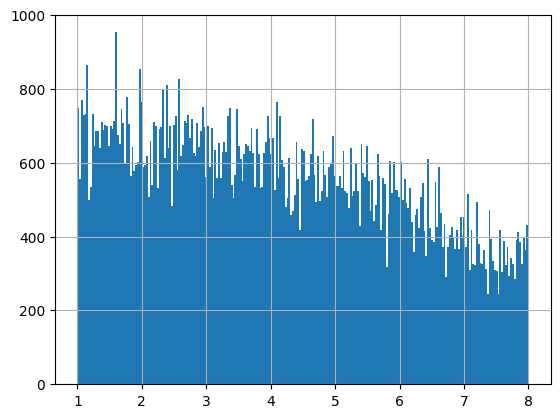

In [6]:
frame.translational_control.hist(bins=250)

<AxesSubplot:>

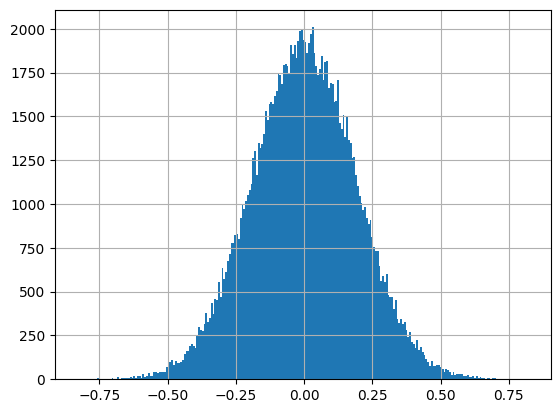

In [7]:
frame.angular_control.hist(bins=250)

<AxesSubplot:>

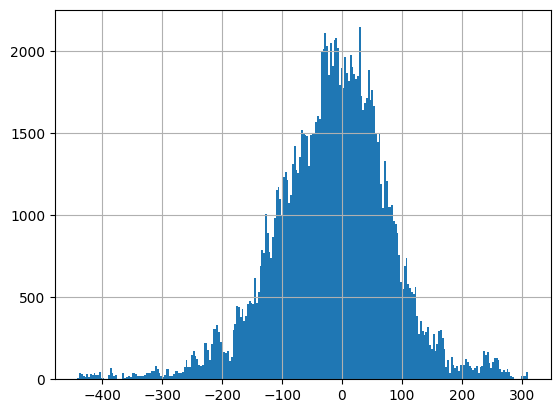

In [8]:
frame.pose_x.hist(bins=250)

<AxesSubplot:>

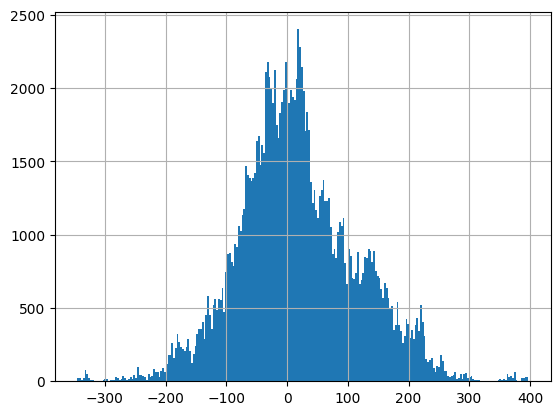

In [9]:
frame.pose_y.hist(bins=250)

<AxesSubplot:>

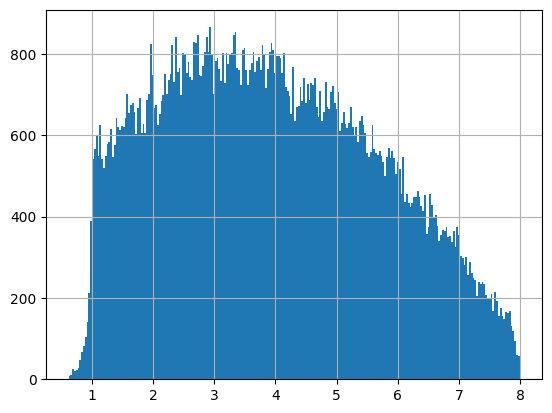

In [10]:
frame.linear_vel_x.hist(bins=250)

<AxesSubplot:>

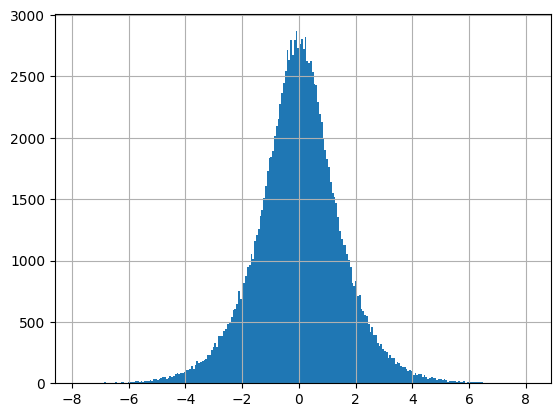

In [11]:
frame.angular_vel_z.hist(bins=250)

Text(0, 0.5, 'Number of datapoints')

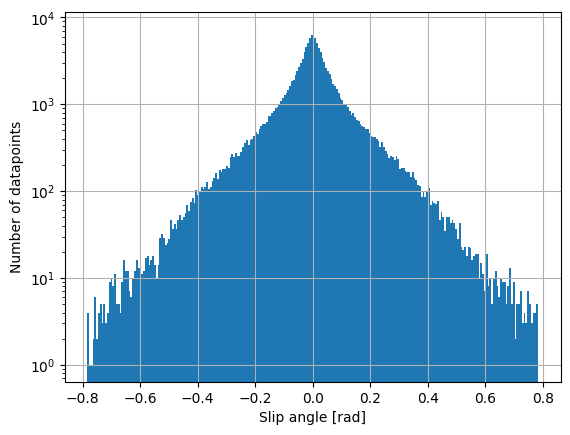

In [12]:
frame.slip_angle.hist(bins=250, log=True)
plt.xlabel('Slip angle [rad]')
plt.ylabel('Number of datapoints')

<AxesSubplot:>

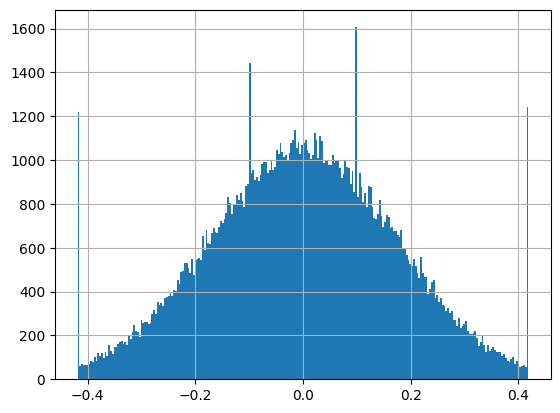

In [13]:
frame.steering_angle.hist(bins=250)

## Delta values

In [14]:
delta_frame = frame[frame.time != 0.00]

<AxesSubplot:>

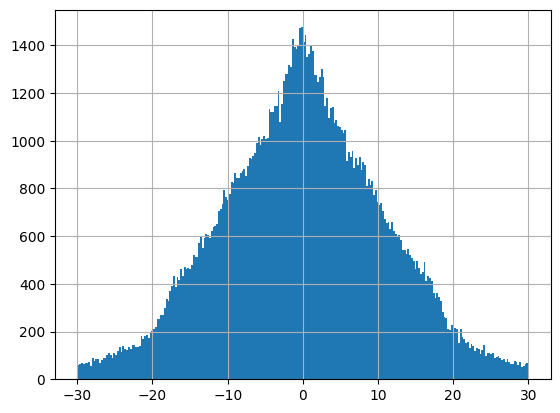

In [15]:
delta_frame.D_angular_vel_z.hist(bins=250)

<AxesSubplot:>

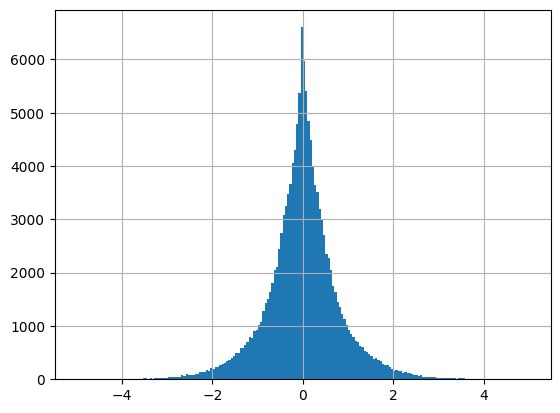

In [16]:
delta_frame.D_slip_angle.hist(bins=200)

<AxesSubplot:>

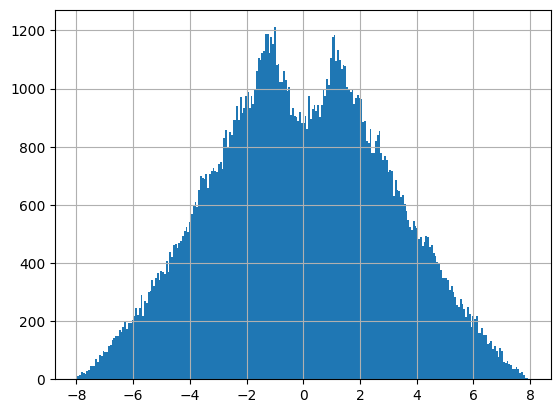

In [17]:
delta_frame.D_pose_x.hist(bins=250)

<AxesSubplot:>

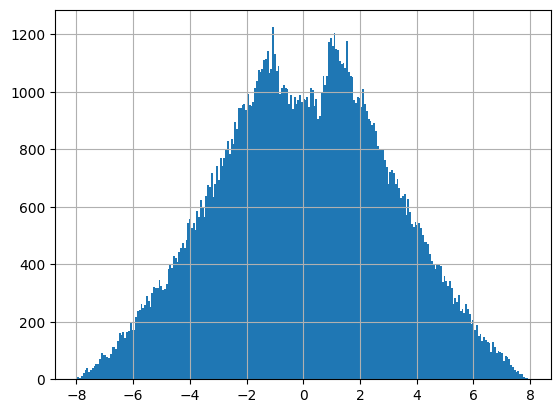

In [18]:
delta_frame.D_pose_y.hist(bins=250)

<AxesSubplot:>

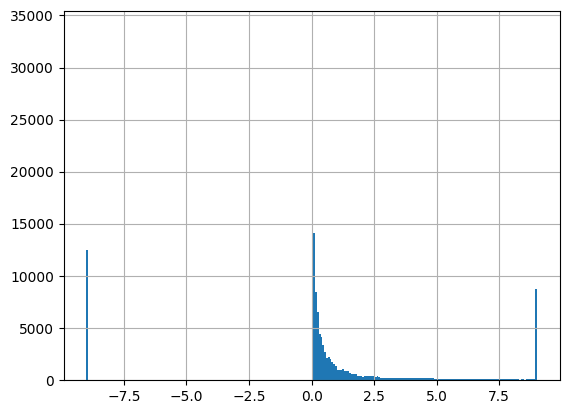

In [19]:
delta_frame.D_linear_vel_x.hist(bins=250)

<AxesSubplot:>

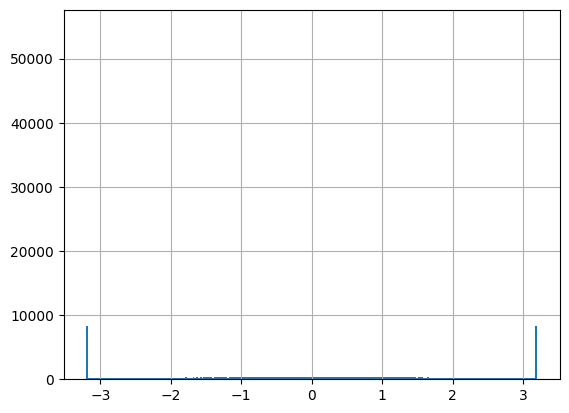

In [20]:
delta_frame.D_steering_angle.hist(bins=250)
# plt.ylim((0, 1000))